# Progarm 10

Implement the non-parametric Locally Weighted Regressionalgorithm in order to
fit data points. Select appropriate data set for your experiment and draw graphs.

Harsh R

In [11]:
from math import ceil
import math
import numpy as np
from scipy import linalg 

def lowess(x,y,f,iter):
    n=len(x)
    r=int(ceil(f*n))
    
    h=[np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:,None] - x[None,:] ) / h),0.0,1.0)
    w = (1-w**3)**3
    
    ypred = np.zeros(n)
    delta = np.ones(n)
    
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:,i]
            b=np.array([np.sum(weights*y), np.sum(weights * y * x)])
            A=np.array([[np.sum(weights), np.sum(weights * x)],
                         [np.sum(weights*x), np.sum(weights*x*x)]])
            
            beta = linalg.solve(A,b)
            ypred[i] = beta[0] + beta[1] * x[i]
            
        res = y - ypred
        s = np.median(np.abs(res))
        delta = np.clip(res / (6.0 * s), -1, 1)
        delta = (1-delta**2)**2
        
    return ypred

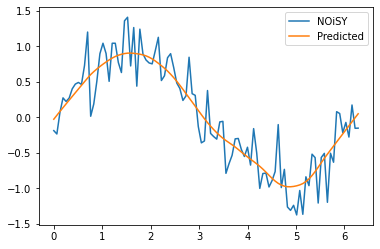

In [12]:
if __name__ == '__main__': 
    n=100
    f=0.25
    x=np.linspace(0, 2*math.pi, n)
    y=np.sin(x) + 0.3*np.random.randn(n)
    
    ypred = lowess(x,y,f,3)
    
    import pylab as p1
    p1.clf()
    p1.plot(x,y, label="NOiSY")
    p1.plot(x,ypred, label="Predicted")
    p1.legend()
    p1.show()